# 查看数据

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
# 读取csv文件

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
# 查看文件行数与列数
print(train_data.shape) #1460个样本，一个样本有81列（80个特征+1个标签）
print(test_data.shape) #1459个样本，一个样本有80列（80个特征）

(1314, 81)
(146, 81)


In [4]:
# 看前四个和最后两个特征，以及相应标签（房价）
print(train_data.iloc[0:4, [0, 1, 2, 3, -3, -2, -1]])

   Id  MSSubClass MSZoning  LotFrontage SaleType SaleCondition  SalePrice
0   1          60       RL         65.0       WD        Normal     208500
1   2          20       RL         80.0       WD        Normal     181500
2   3          60       RL         68.0       WD        Normal     223500
3   4          70       RL         60.0       WD       Abnorml     140000


In [5]:
# 去除id，将训练集与测试集的特征连接起来，便于统一处理
all_features = pd.concat([train_data.iloc[:, 1:-1], test_data.iloc[:, 1:-1]], axis=0)  # 全特征值
print(all_features.iloc[0:4, [0, 1, 2, 3, -3, -2, -1]])


all_labels = pd.concat((train_data.loc[:,'SalePrice'],test_data.loc[:,'SalePrice']))
print(all_labels[0:4])

   MSSubClass MSZoning  LotFrontage  LotArea  YrSold SaleType SaleCondition
0          60       RL         65.0     8450    2008       WD        Normal
1          20       RL         80.0     9600    2007       WD        Normal
2          60       RL         68.0    11250    2008       WD        Normal
3          70       RL         60.0     9550    2006       WD       Abnorml
0    208500
1    181500
2    223500
3    140000
Name: SalePrice, dtype: int64


# 数据预处理

In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import torch

In [7]:
# 查看每列内容的属性
all_features.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 79, dtype: object

In [8]:
# 取出所有的数值型特征名称（列标题）
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index
print('数值特征列名：', numeric_features)

# 取出所有的非数值型特征名称（列标题）
object_features = all_features.dtypes[all_features.dtypes == 'object'].index
print('非数值特征列名：', object_features)


数值特征列名： Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')
非数值特征列名： Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'He

In [9]:
# 将数值型特征进行 z-score 标准化
all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))

In [10]:
# 在标准化数据之后，所有数据都意味着消失，因此我们可以将缺失值设置为0
all_features[numeric_features] = all_features[numeric_features].fillna(0)

In [11]:
# 非数值数据预处理

# 将缺省值NA视为有效特征值
all_features = pd.get_dummies(all_features, dummy_na=True)

all_features.shape # 2919个样本，每个样本331个特征

(1460, 331)

In [12]:
num_train = train_data.shape[0]

# 样本特征转换为tensor
train_features = torch.tensor(all_features[:num_train].values, dtype=torch.float) #(1314, 331)
test_features = torch.tensor(all_features[num_train:].values, dtype=torch.float) #(146, 331)

print(train_features)
print(train_features.shape)

tensor([[ 0.0733, -0.2079, -0.2071,  ...,  1.0000,  0.0000,  0.0000],
        [-0.8723,  0.4097, -0.0919,  ...,  1.0000,  0.0000,  0.0000],
        [ 0.0733, -0.0844,  0.0735,  ...,  1.0000,  0.0000,  0.0000],
        ...,
        [-0.8723, -0.0844, -0.1706,  ...,  0.0000,  1.0000,  0.0000],
        [ 0.0733,  0.0000, -0.0947,  ...,  1.0000,  0.0000,  0.0000],
        [ 0.0733,  1.5627,  0.4265,  ...,  1.0000,  0.0000,  0.0000]])
torch.Size([1314, 331])


In [13]:
# 样本标签转换为tensor
train_labels = torch.tensor(all_labels[:num_train].values, dtype=torch.float)
test_labels = torch.tensor(all_labels[num_train:].values, dtype=torch.float)


# 标签数据变为1列
train_labels = train_labels.view(-1,1)
test_labels = test_labels.view(-1,1)

print(train_labels)

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [203000.],
        [302000.],
        [333168.]])


# 创建数据集与加载数据集

In [14]:
from torch.utils.data import Dataset, TensorDataset, DataLoader

train_dataset = TensorDataset(train_features, train_labels)
test_dataset = TensorDataset(test_features, test_labels)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# 构建神经网络

In [15]:
import torch
from torch import nn, optim
import torch.nn.functional as F

In [16]:
# 神经网络

class Net(nn.Module):# 继承 torch 的 Module
    def __init__(self, n_feature, n_output):
        super(Net, self).__init__()     # 继承 __init__ 功能
        # 定义每层用什么样的形式
        self.layer1 = nn.Linear(n_feature, 600)   #
        self.layer2 = nn.Linear(600, 1200)   #
        self.layer3 = nn.Linear(1200, n_output)

    def forward(self, x):   # 这同时也是 Module 中的 forward 功能
        x = self.layer1(x)
        x = torch.relu(x)      #
        x = self.layer2(x)
        x = torch.relu(x)      #
        x = self.layer3(x)
        return x


# 训练神经网络

In [17]:
from torchkeras import summary,Model

# 初始化神经网络
model = Net(331,1)

In [18]:
# 定义损失函数与优化器

#反向传播算法 SGD Adam等
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
#均方损失函数
criterion =	torch.nn.MSELoss()

In [20]:
# 训练
from torch.autograd import Variable



#记录用于绘图
losses = []#记录每次迭代后训练的loss
eval_losses = []#测试的

for i in range(200):
    train_loss = 0
    
    model.train() #网络设置为训练模式 暂时可加可不加
    for step, (x,y) in enumerate(train_loader):
        tdata = Variable(x)
        tlabel = Variable(y)
        
        #前向传播       
        y_ = model(tdata)
        #记录单批次一次batch的loss
        loss = criterion(y_, tlabel)
        #反向传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #累计单批次误差
        train_loss = train_loss + loss.item()
    losses.append(train_loss / len(train_data))
    
    
    # 测试集进行测试
    eval_loss = 0
    model.eval()  # 可加可不加
    for step,(x,y) in enumerate(test_loader):
        edata = Variable(x)
        elabel = Variable(y)
        
        # 前向传播
        y_ = model(edata)
        # 记录单批次一次batch的loss，测试集就不需要反向传播更新网络了
        loss = criterion(y_, elabel)
        # 累计单批次误差
        eval_loss = eval_loss + loss.item()
    eval_losses.append(eval_loss / len(test_data))

    print('epoch: {}, trainloss: {}, evalloss: {}'.format(i, train_loss / len(train_data), eval_loss / len(test_data)))


epoch: 0, trainloss: 521735859.238965, evalloss: 171339204.38356164
epoch: 1, trainloss: 62410530.776255704, evalloss: 37098076.93150685
epoch: 2, trainloss: 28027879.25722983, evalloss: 15058885.698630137
epoch: 3, trainloss: 18648908.785388127, evalloss: 11985020.05479452
epoch: 4, trainloss: 16826867.409436833, evalloss: 12366688.438356165
epoch: 5, trainloss: 15603950.05175038, evalloss: 13981596.05479452
epoch: 6, trainloss: 14880485.089802131, evalloss: 10222889.643835617
epoch: 7, trainloss: 13775072.730593607, evalloss: 11436232.98630137
epoch: 8, trainloss: 12835798.831050228, evalloss: 10463112.547945205
epoch: 9, trainloss: 12903734.89193303, evalloss: 13086636.273972603
epoch: 10, trainloss: 11739756.590563165, evalloss: 10595328.219178082
epoch: 11, trainloss: 12376901.382039573, evalloss: 11367667.506849315
epoch: 12, trainloss: 11263064.815829528, evalloss: 11654087.671232877
epoch: 13, trainloss: 10764990.867579909, evalloss: 11196439.671232877
epoch: 14, trainloss: 993

epoch: 118, trainloss: 687494.6347031964, evalloss: 11874117.91780822
epoch: 119, trainloss: 697900.2161339421, evalloss: 11242716.93150685
epoch: 120, trainloss: 697596.3576864536, evalloss: 11348873.205479452
epoch: 121, trainloss: 708721.0030441401, evalloss: 11481766.575342465
epoch: 122, trainloss: 654816.8272450533, evalloss: 11536120.767123288
epoch: 123, trainloss: 659750.9436834095, evalloss: 13353090.849315068
epoch: 124, trainloss: 941781.7366818874, evalloss: 13168506.08219178
epoch: 125, trainloss: 1028176.1141552512, evalloss: 11720979.287671233
epoch: 126, trainloss: 664824.0060882801, evalloss: 11970994.410958905
epoch: 127, trainloss: 630045.2115677322, evalloss: 11423529.424657535
epoch: 128, trainloss: 718533.8356164383, evalloss: 11321024.0
epoch: 129, trainloss: 729158.0547945206, evalloss: 10969892.164383562
epoch: 130, trainloss: 837889.1232876712, evalloss: 11659971.287671233
epoch: 131, trainloss: 849741.5479452055, evalloss: 11202661.698630137
epoch: 132, trai

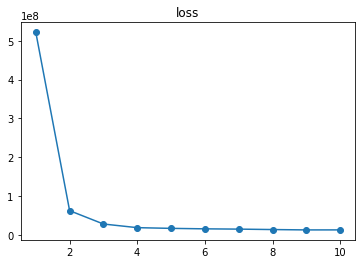

In [21]:
import matplotlib.pyplot as plt

plt.plot(range(1,11,1), losses[:10], marker='o')
plt.title("loss") #标题

plt.show()

# 预测

In [22]:
test_features = torch.tensor(all_features[0:4].values, dtype=torch.float)
print(test_features)

test_labels = torch.tensor(all_labels[0:4].values, dtype=torch.float)
print(test_labels)

output = model(test_features)
print(output)

tensor([[ 0.0733, -0.2079, -0.2071,  ...,  1.0000,  0.0000,  0.0000],
        [-0.8723,  0.4097, -0.0919,  ...,  1.0000,  0.0000,  0.0000],
        [ 0.0733, -0.0844,  0.0735,  ...,  1.0000,  0.0000,  0.0000],
        [ 0.3098, -0.4138, -0.0969,  ...,  0.0000,  0.0000,  0.0000]])
tensor([208500., 181500., 223500., 140000.])
tensor([[214119.9688],
        [177394.6094],
        [219405.1250],
        [131715.1094]], grad_fn=<AddmmBackward>)
